# Overview

## Description

https://www.kaggle.com/c/house-prices-advanced-regression-techniques


### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Practice Skills
* Creative feature engineering 
* Advanced regression techniques like random forest and gradient boosting

## Evaluation

### Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Submission File Format

The file should contain a header and have the following format:

You can download an example submission file (sample_submission.csv) on the [Data page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

# Data Summary

## Data Description

### File descriptions

* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data fields

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Analysis

## Import libs

In [336]:
import numpy as np
import pandas as pd
import scipy, math
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, sys, warnings, importlib, pickle
import dill, shutil

import sklearn.model_selection

mpl.rcParams['font.size'] = 14
pd.options.display.max_columns = 1000

In [8]:
path_desktop = [path for path in ['/root/fastai/','/Users/johnleonard/Desktop/'] if os.path.isdir(path)][0]
if path_desktop not in sys.path:
    sys.path.append(path_desktop)

import JLpy_utils_package as JLutils

## Load Data

In [9]:
path_data_folder = './data/'

df_test = pd.read_csv(path_data_folder+'test.csv', index_col =0)
df_train = pd.read_csv(path_data_folder + 'train.csv', index_col =0)
df = df_train

## Inspect data format

In [10]:
print(df.shape)
display(df.head())

print('')
df.dtypes

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

## Define Feature, Lable, and meta headers

In [11]:
label_header = 'SalePrice'
feature_headers = list(df_train.columns.drop([label_header]))

## Visualize Distribution of Label

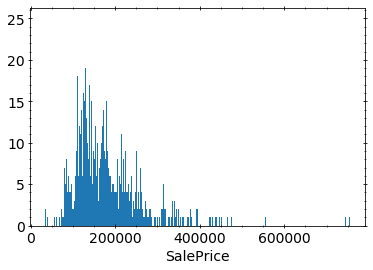

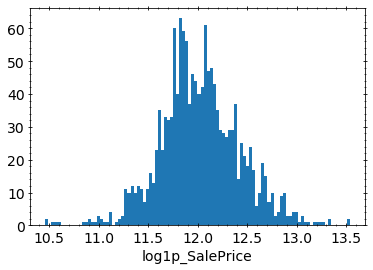

In [12]:
plt.hist(df[label_header], bins=int(df.shape[0]/2))
plt.xlabel(label_header)
plt.grid(which='both')
plt.show()


plt.hist(np.log1p(df[label_header]), bins=100)
plt.xlabel('log1p_'+label_header)
plt.grid(which='both')
plt.show()

We place an option to use log-scale label values in our preprocess pipe function within the models section

# Expand Misc Feature into unique headers

In [13]:
MiscFeatureHeaders = ['MiscFeatuer('+str(feature)+')' for feature in list(df['MiscFeature'].unique())]
MiscFeatureHeaders

['MiscFeatuer(nan)',
 'MiscFeatuer(Shed)',
 'MiscFeatuer(Gar2)',
 'MiscFeatuer(Othr)',
 'MiscFeatuer(TenC)']

In [14]:
def expand_misc_features(df, 
                         MiscFeatureHeaders,
                         verbose =1):
    warnings.filterwarnings('ignore')
    for header in MiscFeatureHeaders:
        header_substr = header.split('(')[1].replace(')','')
        df[header] = np.nan #dummy filling values
        df[header][df['MiscFeature']==header_substr] = df['MiscVal']
        if verbose >=1:
            print('new feature:', header, '\n\tunique values:',df[header].unique())

    df = df.drop(columns=['MiscFeature','MiscVal'])
    warnings.filterwarnings('default')
    
    return df

df = expand_misc_features(df, MiscFeatureHeaders)

new feature: MiscFeatuer(nan) 
	unique values: [nan]
new feature: MiscFeatuer(Shed) 
	unique values: [  nan  700.  350.  500.  400.  480.  450. 1200.  800. 2000.  600. 1300.
   54.  620.  560. 1400.    0. 1150. 2500.]
new feature: MiscFeatuer(Gar2) 
	unique values: [   nan 15500.  8300.]
new feature: MiscFeatuer(Othr) 
	unique values: [  nan 3500.    0.]
new feature: MiscFeatuer(TenC) 
	unique values: [  nan 2000.]


In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MiscFeatuer(nan),MiscFeatuer(Shed),MiscFeatuer(Gar2),MiscFeatuer(Othr),MiscFeatuer(TenC)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,2,2008,WD,Normal,208500,NaN,NaN,NaN,NaN,NaN
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,5,2007,WD,Normal,181500,NaN,NaN,NaN,NaN,NaN
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,9,2008,WD,Normal,223500,NaN,NaN,NaN,NaN,NaN
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,2,2006,WD,Abnorml,140000,NaN,NaN,NaN,NaN,NaN
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,12,2008,WD,Normal,250000,NaN,NaN,NaN,NaN,NaN


# Specify continuous and categorical features

In [16]:
headers_list = list(df.columns)
continuous_feature_headers = ['LotFrontage',# Linear feet of street connected to property
                               'LotArea',# Lot size in square feet
                               'MasVnrArea',# Masonry veneer area in square feet
                               'BsmtFinSF1',# Type 1 finished square feet
                               'BsmtFinSF2',# Type 2 finished square feet
                               'BsmtUnfSF',# Unfinished square feet of basement area
                               'TotalBsmtSF',# Total square feet of basement area
                               '1stFlrSF',#: First Floor square feet
                               '2ndFlrSF',#: Second floor square feet
                               'LowQualFinSF',# Low quality finished square feet (all floors)
                               'GrLivArea',# Above grade (ground) living area square feet
                               'GarageArea',# Size of garage in square feet
                               'WoodDeckSF',# Wood deck area in square feet
                               'OpenPorchSF',# Open porch area in square feet
                               'EnclosedPorch',# Enclosed porch area in square feet
                               '3SsnPorch',# Three season porch area in square feet
                               'ScreenPorch',# Screen porch area in square feet
                               'PoolArea',# Pool area in square feet
                               'MoSold',# Month Sold
                               'YrSold',# Year Sold
                               'YearBuilt',
                               'YearRemodAdd',
                               'OverallQual',
                               'OverallCond',
                               'BsmtFullBath',
                               'BsmtHalfBath',
                               'FullBath',
                               'HalfBath',
                               'BedroomAbvGr',
                               'KitchenAbvGr',
                               'TotRmsAbvGrd',
                               'GarageCars',
                               'GarageYrBlt',
                               'Fireplaces',
                               'MSSubClass',
                              ] + MiscFeatureHeaders
print('----continuous_feature_headers----\n',continuous_feature_headers)

categorical_feature_headers = headers_list
for header in continuous_feature_headers: categorical_feature_headers.remove(header)
for header in ['SalePrice']: categorical_feature_headers.remove(header)
print('\n----categorical_feature_headers----\n',categorical_feature_headers)

----continuous_feature_headers----
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageYrBlt', 'Fireplaces', 'MSSubClass', 'MiscFeatuer(nan)', 'MiscFeatuer(Shed)', 'MiscFeatuer(Gar2)', 'MiscFeatuer(Othr)', 'MiscFeatuer(TenC)']

----categorical_feature_headers----
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',

In [17]:
class fill_categorical_nan():
    def fit(df, categorical_feature_headers, nan_fill_method = 'most_frequent'):
        fill_categorical_nan_dict={}
        for header in categorical_feature_headers:
            value_counts = df[header].value_counts()

            if nan_fill_method=='most_frequent':
                nan_fill_value = value_counts[value_counts==value_counts.max()].index.values[0]

            fill_categorical_nan_dict[header] = nan_fill_value
            df[header] = df[header].fillna(nan_fill_value)

        return df, fill_categorical_nan_dict
    
    def transform(df, categorical_feature_headers, fill_categorical_nan_dict):
        for header in categorical_feature_headers:
            df[header] = df[header].fillna(fill_categorical_nan_dict[header])
        return df
            
df, fill_categorical_nan_dict = fill_categorical_nan.fit(df, 
                                                         categorical_feature_headers,
                                                         nan_fill_method = 'most_frequent')    

In [18]:
fill_categorical_nan_dict

{'MSZoning': 'RL',
 'Street': 'Pave',
 'Alley': 'Grvl',
 'LotShape': 'Reg',
 'LandContour': 'Lvl',
 'Utilities': 'AllPub',
 'LotConfig': 'Inside',
 'LandSlope': 'Gtl',
 'Neighborhood': 'NAmes',
 'Condition1': 'Norm',
 'Condition2': 'Norm',
 'BldgType': '1Fam',
 'HouseStyle': '1Story',
 'RoofStyle': 'Gable',
 'RoofMatl': 'CompShg',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'MasVnrType': 'None',
 'ExterQual': 'TA',
 'ExterCond': 'TA',
 'Foundation': 'PConc',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Heating': 'GasA',
 'HeatingQC': 'Ex',
 'CentralAir': 'Y',
 'Electrical': 'SBrkr',
 'KitchenQual': 'TA',
 'Functional': 'Typ',
 'FireplaceQu': 'Gd',
 'GarageType': 'Attchd',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageCond': 'TA',
 'PavedDrive': 'Y',
 'PoolQC': 'Gd',
 'Fence': 'MnPrv',
 'SaleType': 'WD',
 'SaleCondition': 'Normal'}

In [19]:
for header in categorical_feature_headers:
    print(header, df[header].sort_values().unique())

MSZoning ['C (all)' 'FV' 'RH' 'RL' 'RM']
Street ['Grvl' 'Pave']
Alley ['Grvl' 'Pave']
LotShape ['IR1' 'IR2' 'IR3' 'Reg']
LandContour ['Bnk' 'HLS' 'Low' 'Lvl']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Condition1 ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Condition2 ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
BldgType ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
RoofStyle ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
RoofMatl ['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']
Exterior1st ['AsbShng' 'AsphShn' 'Br

# Perform Label Encoding on Text-based classes

In [20]:
import sklearn.preprocessing

label_encoder_dict = {}
for header in categorical_feature_headers:
    #if df[header].dtype=='O': #only encode object data (text data)
    label_encoder_dict[header] = sklearn.preprocessing.LabelEncoder()
    
    #fetch unique values to encode
    if df[header].dropna().dtype=='O':
        unique_values = list(df[header].fillna('NA').sort_values().unique())
        
        #ensure encoding has 'NA value'  
        if 'NA' not in unique_values:
            unique_values.append('NA')
            
    else:
        unique_values = list(df[header].sort_values().fillna(-1).unique())
        
        #ensure encoding has 'NA value'    
        if -1 not in unique_values:
            unique_values.append(-1)
        
        #if the column of interest is int dtype, ensure the encoding encompasses all values between the min and max int
        unique_values = list(np.linspace(np.min(unique_values), np.max(unique_values), 
                                         np.max(unique_values) - np.min(unique_values)+1).astype(int))
        
        for value in df[header].sort_values().fillna(-1).unique():
            assert(value in unique_values), 'value not found in unique values list'

    
    label_encoder_dict[header].fit(unique_values)

In [21]:
def label_encode_categorical_features(df, 
                                      label_encoder_dict):
    warnings.filterwarnings('ignore')
    for header in label_encoder_dict.keys():
        #test if each of the df unique values are in the label encoder, otherwise replace with np.nan
        for unique in df[header].dropna().sort_values().unique():
            if unique not in label_encoder_dict[header].classes_:
                df[header][df[header]==unique] = np.nan
                print('warning:',unique,'not found in label_encoder_dict[',header,'].classes_, assuming np.nan')
        try:
            if df[header].dropna().dtype=='O':
                df[header] = label_encoder_dict[header].transform(df[header].fillna('NA'))
            else:
                df[header] = label_encoder_dict[header].transform(df[header].fillna(-1).astype(int))
        except:
            print('header:',header)
            print(df[header].dtype)
            print(df[header].sort_values().unique())
            print(label_encoder_dict[header].classes_)
            raise
    return df

In [22]:
df = label_encode_categorical_features(df, label_encoder_dict)

In [23]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MiscFeatuer(nan),MiscFeatuer(Shed),MiscFeatuer(Gar2),MiscFeatuer(Othr),MiscFeatuer(TenC)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,3,0,4,0,5,3,3,0,5,7,5,2003,2003,1,1,13,14,1,196.0,2,5,3,2,4,4,2,706,6,0,150,856,1,0,2,5,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,1,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,2,2,2,2008,9,5,208500,NaN,NaN,NaN,NaN,NaN
2,20,4,80.0,9600,2,0,4,3,0,2,0,25,1,3,0,2,6,8,1976,1976,1,1,8,8,3,0.0,4,5,1,2,4,1,0,978,6,0,284,1262,1,0,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,1,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,2,2,5,2007,9,5,181500,NaN,NaN,NaN,NaN,NaN
3,60,4,68.0,11250,2,0,0,3,0,4,0,5,3,3,0,5,7,5,2001,2002,1,1,13,14,1,162.0,2,5,3,2,4,2,2,486,6,0,434,920,1,0,2,5,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,5,1,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,2,2,9,2008,9,5,223500,NaN,NaN,NaN,NaN,NaN
4,70,4,60.0,9550,2,0,0,3,0,0,0,6,3,3,0,5,7,5,1915,1970,1,1,14,16,3,0.0,4,5,0,4,1,4,0,216,6,0,540,756,1,2,2,5,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,2,5,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,2,2,2,2006,9,0,140000,NaN,NaN,NaN,NaN,NaN
5,60,4,84.0,14260,2,0,0,3,0,2,0,16,3,3,0,5,8,5,2000,2000,1,1,13,14,1,350.0,2,5,3,2,4,0,2,655,6,0,490,1145,1,0,2,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,5,1,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,2,2,12,2008,9,5,250000,NaN,NaN,NaN,NaN,NaN


# Define One Hot Encoder Function

In [24]:
categories = []
for key in label_encoder_dict.keys():
    categories.append([label_encoder_dict[key].transform([class_])[0] for class_ in label_encoder_dict[key].classes_])

In [25]:
OneHotEncoder = sklearn.preprocessing.OneHotEncoder( categories=categories)
OneHotEncoder.fit(df[categorical_feature_headers])

OneHotEncoder(categorical_features=None,
              categories=[[0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2],
                          [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2],
                          [0, 1, 2, 3, 4, 5], [0, 1, 2, 3],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                           16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                           15],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                           16],
                          [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5],
                          [0, 1, 2, 3, 4, 5

In [26]:
def OneHotEncode_categorical_features(df, categorical_feature_headers, OneHotEncoder):
    #check to see if the categories are consistant for the OneHotEncoder fit
    
    
    #fetch one hot encodings
    try:
        one_hot_encodings = OneHotEncoder.transform(df[categorical_feature_headers]).toarray()
    except:
        for header in categorical_feature_headers:
            print(header,df[header].unique())
        raise
    
    #drop non-encoded categorical features
    df = df.drop(columns = categorical_feature_headers)
    
    i=0
    j=0
    for header in categorical_feature_headers:
        for category_encoding in OneHotEncoder.categories_[i]:
            
            #fetch the categorical label
            category_label = label_encoder_dict[header].inverse_transform([category_encoding])[0]
            
            #fetch the one hot label
            one_hot_label = header+'_'+str(category_label)
            
            #add one-hot encoded column to df
            df[one_hot_label] = one_hot_encodings[:,j].astype(int)
            j+=1
        i+=1
    return df

# test out function, only apply it in the preprocess pipeline thoug
OneHotEncode_categorical_features(df, categorical_feature_headers, OneHotEncoder).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,MiscFeatuer(nan),MiscFeatuer(Shed),MiscFeatuer(Gar2),MiscFeatuer(Othr),MiscFeatuer(TenC),MSZoning_C (all),MSZoning_FV,MSZoning_NA,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_NA,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_NA,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_NA,Utilities_AllPub,Utilities_NA,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_NA,LandSlope_Gtl,LandSlope_Mod,LandSlope_NA,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NA,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NA,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NA,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_NA,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_NA,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_NA,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_NA,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_NA,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_NA,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_NA,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_NA,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_NA,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_NA,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_NA,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_NA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electric

# Define Continuous Feature Scaler

In [27]:
continuous_feature_scaler = sklearn.preprocessing.MinMaxScaler()

#fill in nan values
na_fill_method = np.median
for header in continuous_feature_headers:
    na_filler = na_fill_method(df[header].dropna())
    if math.isnan(na_filler):
        na_filler = 0
    df[header] = df[header].fillna(na_filler)
    
continuous_feature_scaler.fit(df[continuous_feature_headers])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
def scale_continuous_features(df, 
                              continuous_feature_headers,
                              continuous_feature_scaler,
                              na_fill_method = np.median):
    
    for header in continuous_feature_headers:
        na_filler = na_fill_method(df[header].dropna())
        if math.isnan(na_filler):
            na_filler = 0
        df[header] = df[header].fillna(na_filler)
    
    scaled_features = continuous_feature_scaler.transform(df[continuous_feature_headers])
    i=0
    for header in continuous_feature_headers:
        df[header] = scaled_features[:,i]
        i+=1
        
    return df

In [29]:
df = scale_continuous_features(df, 
                              continuous_feature_headers,
                              continuous_feature_scaler)

In [30]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MiscFeatuer(nan),MiscFeatuer(Shed),MiscFeatuer(Gar2),MiscFeatuer(Othr),MiscFeatuer(TenC)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.235294,4,0.150685,0.033420,2,0,4,3,0,4,0,5,3,3,0,5,0.666667,0.500,0.949275,0.883333,1,1,13,14,1,0.12250,2,5,3,2,4,4,2,0.125089,6,0.0,0.064212,0.140098,1,0,2,5,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,2,0.500000,7,0.000000,2,1,0.936364,2,0.50,0.386460,5,5,3,0.000000,0.111517,0.000000,0.0,0.0,0.0,2,2,0.090909,0.50,9,5,208500,0.0,0.2,0.5,0.5,0.0
2,0.000000,4,0.202055,0.038795,2,0,4,3,0,2,0,25,1,3,0,2,0.555556,0.875,0.753623,0.433333,1,1,8,8,3,0.00000,4,5,1,2,4,1,0,0.173281,6,0.0,0.121575,0.206547,1,0,2,5,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,4,0.333333,7,0.333333,5,1,0.690909,2,0.50,0.324401,5,5,3,0.347725,0.000000,0.000000,0.0,0.0,0.0,2,2,0.363636,0.25,9,5,181500,0.0,0.2,0.5,0.5,0.0
3,0.235294,4,0.160959,0.046507,2,0,0,3,0,4,0,5,3,3,0,5,0.666667,0.500,0.934783,0.866667,1,1,13,14,1,0.10125,2,5,3,2,4,2,2,0.086109,6,0.0,0.185788,0.150573,1,0,2,5,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,2,0.333333,7,0.333333,5,1,0.918182,2,0.50,0.428773,5,5,3,0.000000,0.076782,0.000000,0.0,0.0,0.0,2,2,0.727273,0.50,9,5,223500,0.0,0.2,0.5,0.5,0.0
4,0.294118,4,0.133562,0.038561,2,0,0,3,0,0,0,6,3,3,0,5,0.666667,0.500,0.311594,0.333333,1,1,14,16,3,0.00000,4,5,0,4,1,4,0,0.038271,6,0.0,0.231164,0.123732,1,2,2,5,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,2,0.416667,7,0.333333,2,5,0.890909,3,0.75,0.452750,5,5,3,0.000000,0.063985,0.492754,0.0,0.0,0.0,2,2,0.090909,0.00,9,0,140000,0.0,0.2,0.5,0.5,0.0
5,0.235294,4,0.215753,0.060576,2,0,0,3,0,2,0,16,3,3,0,5,0.777778,0.500,0.927536,0.833333,1,1,13,14,1,0.21875,2,5,3,2,4,0,2,0.116052,6,0.0,0.209760,0.187398,1,0,2,5,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,2,0.583333,7,0.333333,5,1,0.909091,2,0.75,0.589563,5,5,3,0.224037,0.153565,0.000000,0.0,0.0,0.0,2,2,1.000000,0.50,9,5,250000,0.0,0.2,0.5,0.5,0.0


# Inspect Correlations

	----All Correlations----


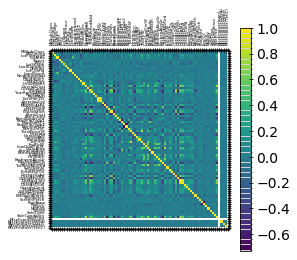

In [31]:
df_corr = df.corr()

def plot_corr_matrix(df_corr):
    plt.matshow(df_corr)
    plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation = 'vertical', fontsize=4)
    plt.yticks(range(len(df_corr.columns)), df_corr.columns, fontsize=4)
    plt.colorbar()
    plt.grid(which='both')
    plt.show()
    
print('\t----All Correlations----')
plot_corr_matrix(df_corr)

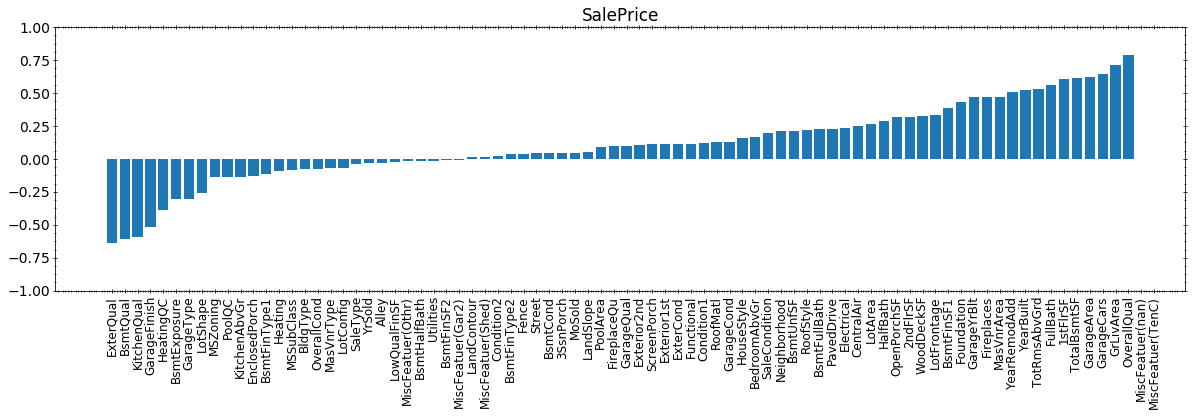

In [32]:
for label in ['SalePrice']:
    df_corr_slice = df_corr[label].drop(labels=['SalePrice'])
    df_corr_slice = df_corr_slice.sort_values()
    
    plt.title(label)
    plt.bar(x = df_corr_slice.index, 
            height= df_corr_slice.values)
    plt.grid(which='both')
    plt.xticks(rotation='vertical',fontsize=12)
    plt.tight_layout(rect=(0,0,2.8,1.5))
    plt.ylim((-1,1))
    plt.show()

					---- Histograms ----


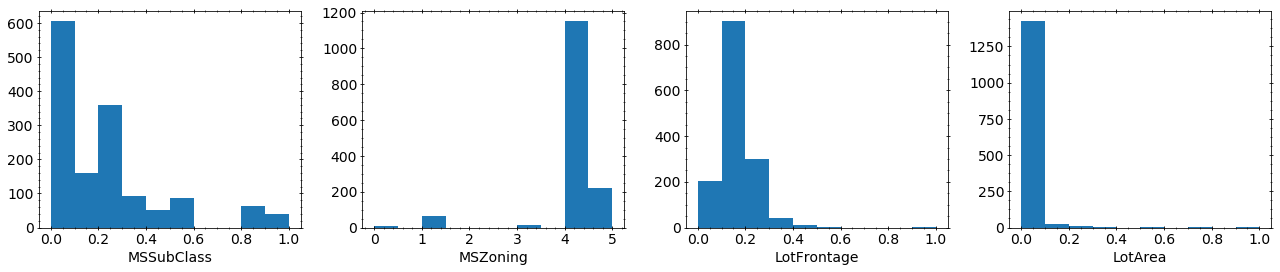

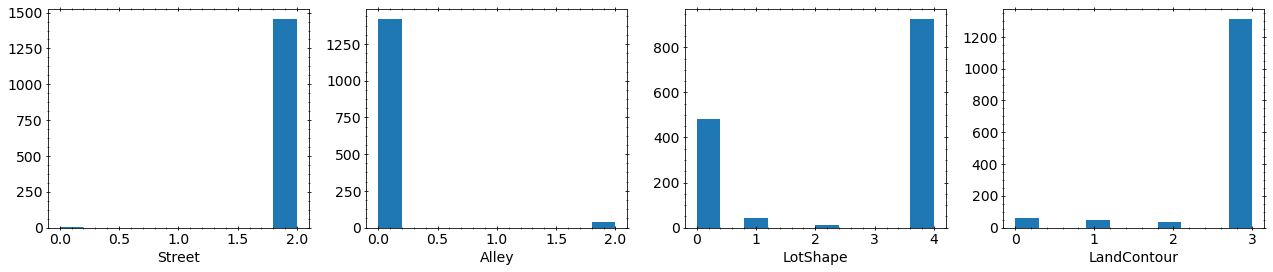

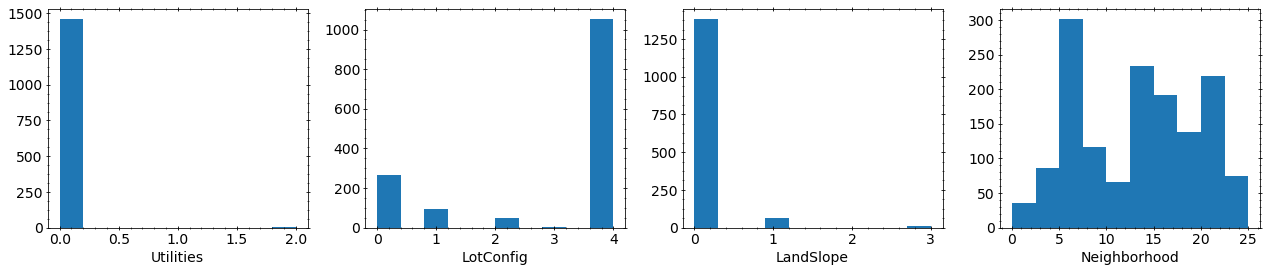

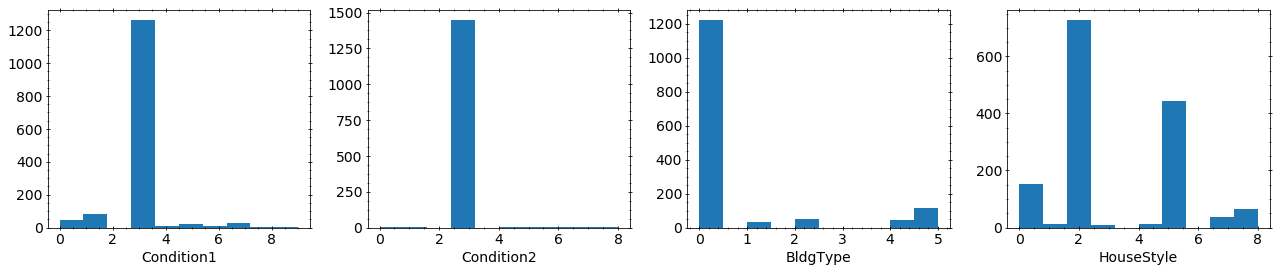

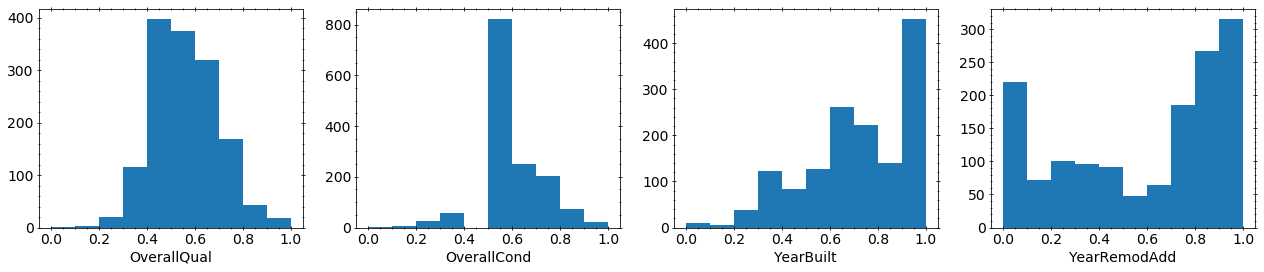

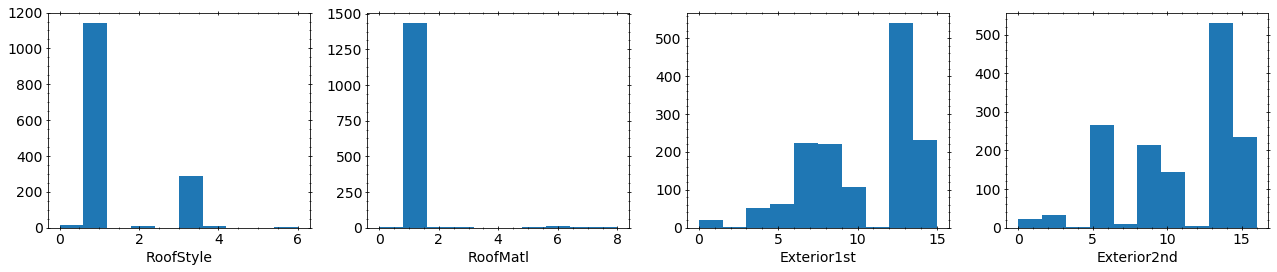

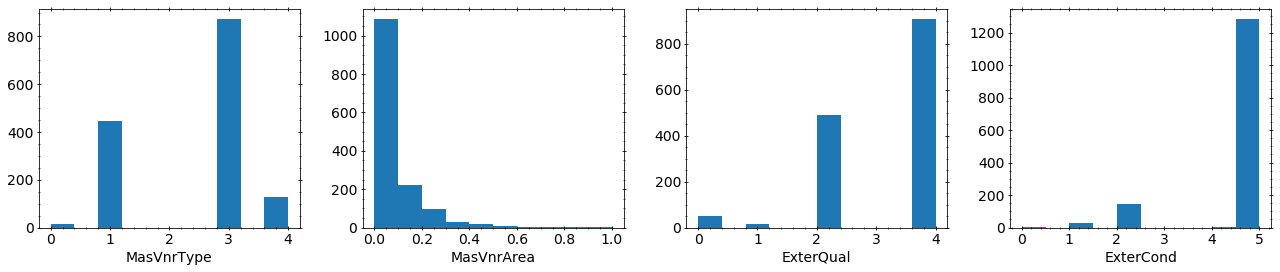

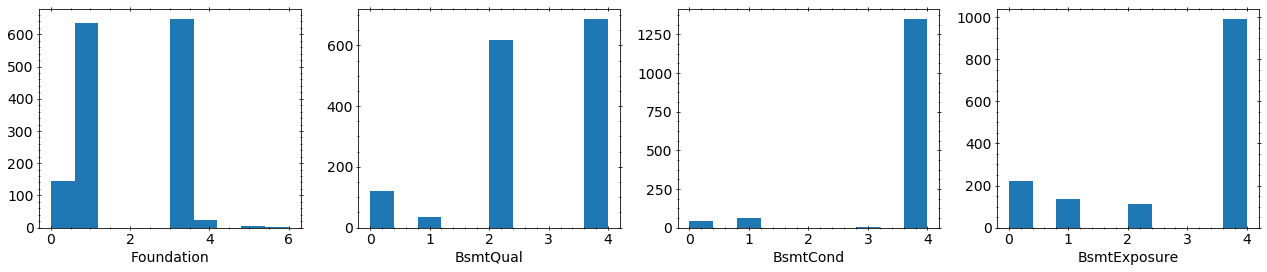

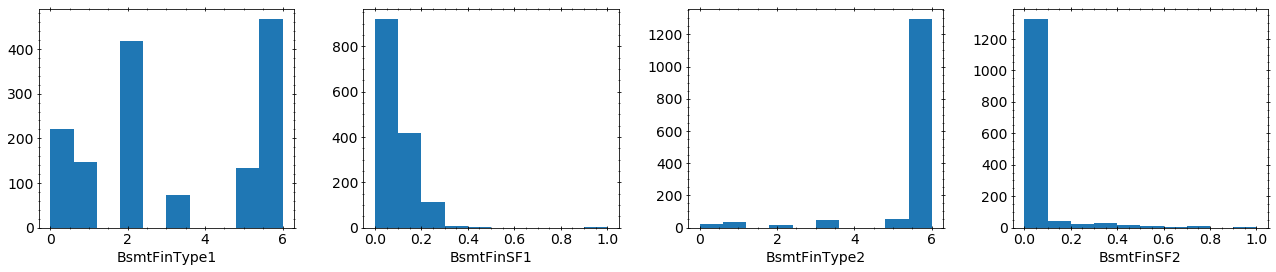

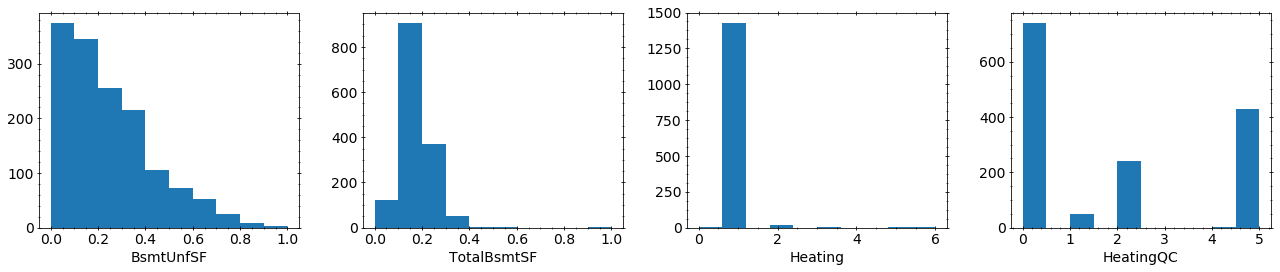

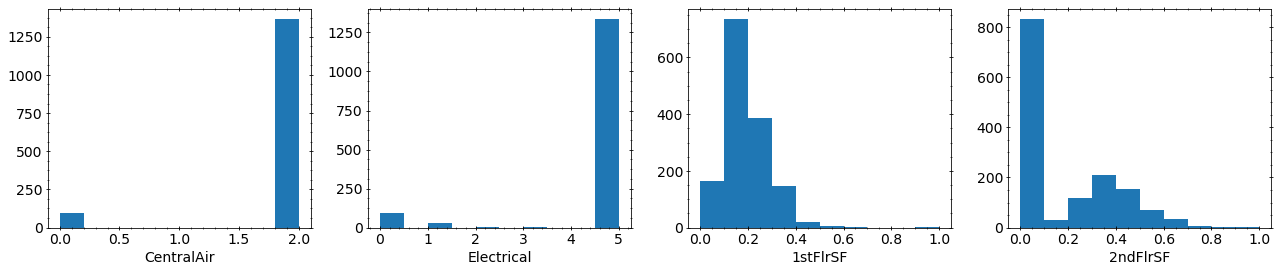

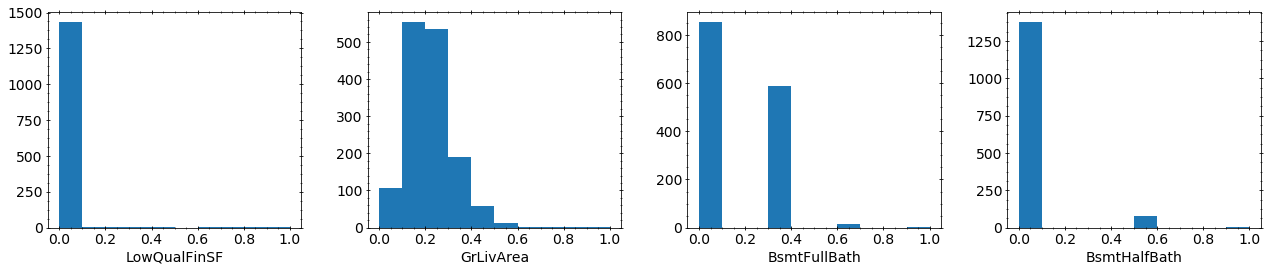

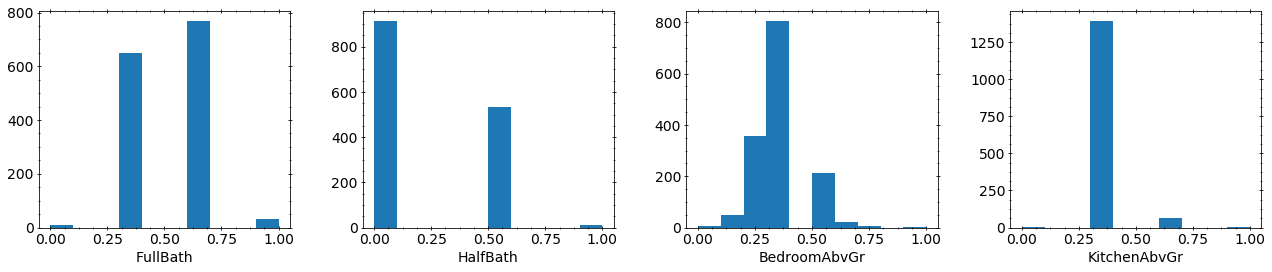

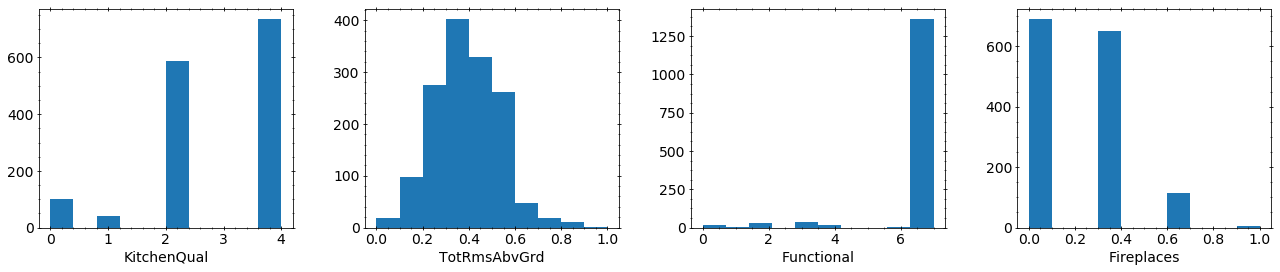

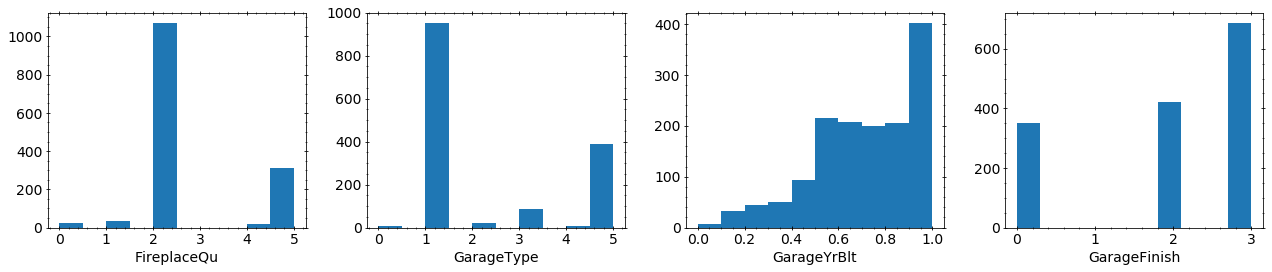

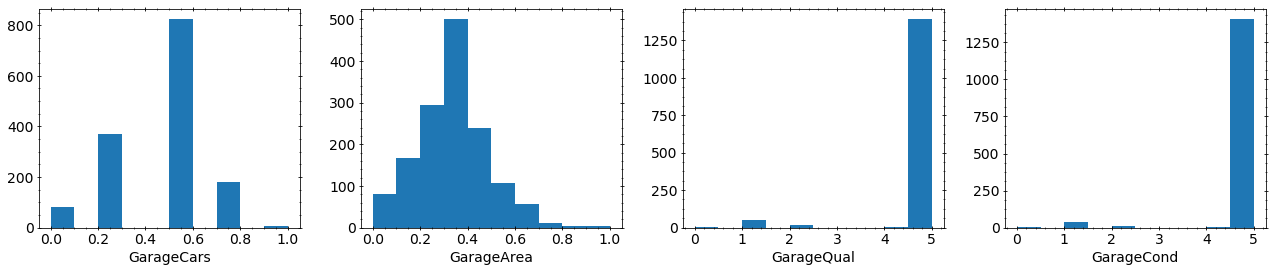

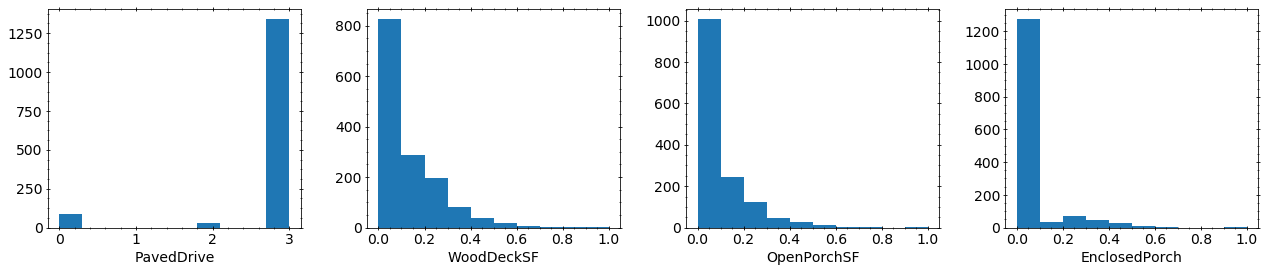

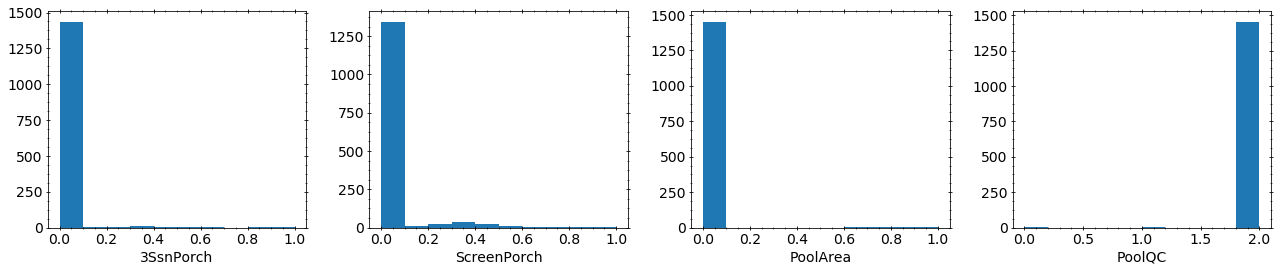

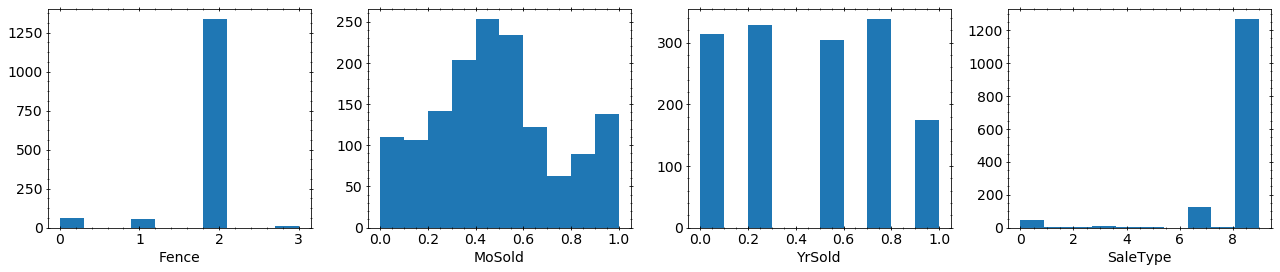

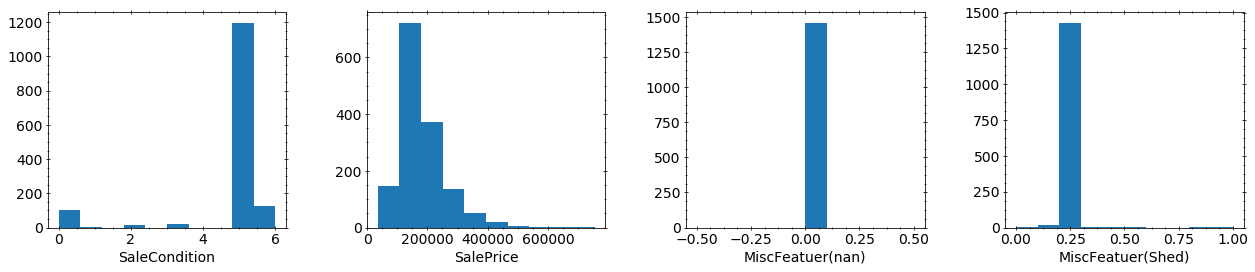

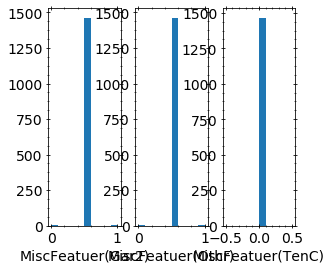

In [33]:
print('\t\t\t\t\t---- Histograms ----')
plt_idx=1
for header in df.columns:
    plt.subplot(1,4,plt_idx)
    plt.hist(df[header])
    plt.grid(which='both')
    plt.xlabel(header)
    
    plt_idx+=1
    if plt_idx>4: 
        plt_idx=1
        plt.tight_layout(rect=(0,0,3,1))
        plt.show()

# Build Models

## Preprocess Pipeline

In [350]:
def preprocess_pipeline(df,
                        label_header,
                        feature_headers,
                        continuous_feature_headers,
                        categorical_feature_headers,
                        MiscFeatureHeaders,
                        fill_categorical_nan_dict,
                        label_encoder_dict,
                        OneHotEncoder,
                        continuous_feature_scaler,
                        continuous_feature_na_fill_method,
                        yscale = 'linear',
                        one_hot_encode = True):
    
    X = df[feature_headers]
    if label_header in df:
        y = df[label_header]

        if yscale == 'log':
            y = np.log10(y)
    else:
        y = pd.Series([np.nan for i in range(df.shape[0])],name=label_header)
        
    X = expand_misc_features(X, MiscFeatureHeaders, verbose=0)
    
    X = fill_categorical_nan.transform(X, categorical_feature_headers, 
                                       fill_categorical_nan_dict)
    
    X = label_encode_categorical_features(X, label_encoder_dict)
    
    if one_hot_encode:
        X = OneHotEncode_categorical_features(X, categorical_feature_headers, OneHotEncoder)
    
    X = scale_continuous_features(X, 
                                  continuous_feature_headers, continuous_feature_scaler,
                                  na_fill_method = continuous_feature_na_fill_method)

    #ensure non nan values are present
    for header in X:
        nans = X[X[header].isna()]
        if nans.shape[0]!=0:
            display(nans)
        assert(nans.shape[0]==0), header+' contains nan values'
    
    return X, y


def save_dict(dict_, path_cases_dict, case_id, filename):
    path_file = os.path.join(path_cases_dict[case_id],filename)
    f = open(path_file, 'wb') 
    dill.dump(dict_, f)
    f.close()
    
def load_dict(path_cases_dict, case_id, filename):
    path_file = os.path.join(path_cases_dict[case_id],filename)
    f = open(path_file, 'rb') 
    dict_ = dill.load(f)
    f.close()
    return dict_

In [452]:
def feature_engineering_comparison_pipeline(df_train, df_test,
                                            label_header,
                                            feature_headers,
                                            continuous_feature_headers,
                                            categorical_feature_headers,
                                            MiscFeatureHeaders,
                                            fill_categorical_nan_dict,
                                            label_encoder_dict,
                                            OneHotEncoder,
                                            continuous_feature_scaler,
                                            continuous_feature_na_fill_method,
                                            yscale_cases = ['linear','log'],
                                            one_hot_encode_cases = [True, False],
                                            metrics = {None:None},
                                            verbose = 2,
                                            path_cases_root_folder = './feature_eng_cases/',
                                            retrain = False):
    """
    train and test models using different forms of feature engineering (w/ or without log yscale, with or without one-hot encoding)
    """
    
    if os.path.isdir(path_cases_root_folder)==False:
        os.makedirs(path_cases_root_folder)
    
    path_cases_dict = {}
    df_metrics_list = []
    for yscale in yscale_cases:
        for one_hot_encode in one_hot_encode_cases:
            
            print('\n-----------------------------------------------------')
            case_id = 'yscale('+yscale+'),one_hot_encode('+str(one_hot_encode)+')'
            path_cases_dict[case_id] = os.path.join(path_cases_root_folder, case_id)
            if os.path.isdir(path_cases_dict[case_id])==False:
                os.makedirs(path_cases_dict[case_id])
            
            if verbose>=1:
                print('----case_id:',case_id,'----')
                print('\tsave path:',path_cases_dict[case_id])
            
            filename = 'data_dict.dill'
            if retrain or os.path.isfile(os.path.join(path_cases_dict[case_id],filename))==False:
                #instatiate dictionary for case
                data_dict={}

                #run preprocessing
                data_dict['X'], data_dict['y'] = preprocess_pipeline(df_train,
                                                                     label_header,
                                                                     feature_headers,
                                                                     continuous_feature_headers,
                                                                     categorical_feature_headers,
                                                                    MiscFeatureHeaders,
                                                                    fill_categorical_nan_dict,
                                                                     label_encoder_dict,
                                                                     OneHotEncoder,
                                                                     continuous_feature_scaler,
                                                                     continuous_feature_na_fill_method,
                                                                     yscale = yscale,
                                                                     one_hot_encode = one_hot_encode)


                data_dict['X_test'], _ = preprocess_pipeline(df_test,
                                                            label_header,
                                                            feature_headers,
                                                            continuous_feature_headers,
                                                            categorical_feature_headers,
                                                            MiscFeatureHeaders,
                                                            fill_categorical_nan_dict,
                                                            label_encoder_dict,
                                                            OneHotEncoder,
                                                            continuous_feature_scaler,
                                                            continuous_feature_na_fill_method,
                                                            yscale = yscale,
                                                            one_hot_encode = one_hot_encode)


                for key in ['X','X_test']:
                    if verbose >=2:
                        print('\t\t\t----',key,'----')
                        display(data_dict[key].head(),
                                data_dict[key].shape)
                    elif verbose ==1:
                        print('\t',key,'shape:',data_dict[key].shape)

                #ensure the train_validation set and the test set have the same column structure
                for i in range(data_dict['X'].shape[1]):
                    assert(data_dict['X'].columns[i]==data_dict['X_test'].columns[i]), print(X.columns[i],X_test.columns[i])

                #Build train validation set
                data_dict['X_train'], data_dict['X_valid'],\
                data_dict['y_train'], data_dict['y_valid'] = sklearn.model_selection.train_test_split(data_dict['X'],data_dict['y'], 
                                                                                                      test_size=0.3)
                assert(data_dict['X_train'].shape[1]==data_dict['X_valid'].shape[1])

                #save the data for this case
                save_dict(data_dict, 
                          path_cases_dict, case_id, filename)
            else:
                print('\tloading pre-exisiting', filename)
                data_dict = load_dict(path_cases_dict, case_id, filename)
                
            # fetch number of features and labels
            n_features = data_dict['X_train'].shape[1]
            if len(data_dict['y_train'].shape)>1:
                n_labels = data_dict['y_train'].shape[1]
            else:
                n_labels = 1
            
            #fetch or train models
            models_dict = JLutils.ML_models.fetch.models_dict.regression(n_features, n_labels)
            
            models_dict = JLutils.ML_models.search.GridSearchCV(models_dict ,
                                                                  data_dict['X_train'],
                                                                  data_dict['y_train'],
                                                                  data_dict['X_valid'],
                                                                  data_dict['y_valid'],
                                                                  cv=5,
                                                                  metrics = metrics,
                                                                  retrain = retrain,
                                                                  path_root_dir = path_cases_dict[case_id],
                                                                  epochs = 100
                                                                )
           

            models_dict, df_metrics = JLutils.ML_models.compare.model_metrics(models_dict, metrics)
            df_metrics['case_id'] = case_id
            df_metrics_list.append(df_metrics)

#             #save the models
#             for key in models_dict.keys():
#                 model_dir = os.path.join(path_cases_dict[case_id], key)
#                 if 'Net' not in key:
#                     if os.path.isdir(model_dir)==False:
#                         os.makedirs(model_dir)
#                     path_file = os.path.join(model_dir,filename)
#                     f = open(path_file, 'wb') 
#                     dill.dump(models_dict[key], f)
#                     f.close()
#                 else:
#                     if retrain or os.path.isfile(path_file)==False:
#                         if os.path.isdir(model_dir):
#                             shutil.rmtree(model_dir)
#                         shutil.move('GridSearchCV',model_dir)
            
            print('\n-----------------------------------------------------\n')
    
    df_metrics = pd.concat(df_metrics_list).sort_values(list(metrics.keys())[0]).reset_index(drop=True)
    
    return path_cases_dict, df_metrics

In [453]:
# define custom metric functions 
def RMSLE(y_true,y_pred): #Score used on Kaggle Leaderboard
    y_pred[y_pred<0]=0
    return np.sqrt(sklearn.metrics.mean_squared_log_error(y_true,y_pred))

metrics = {'RMSLE':RMSLE,
           'r2_score':sklearn.metrics.r2_score }

In [470]:
importlib.reload(JLutils)
importlib.reload(JLutils.ML_models.NeuralNet.DenseNet)
importlib.reload(JLutils.ML_models.NeuralNet.search)
importlib.reload(JLutils.ML_models.fetch)
importlib.reload(JLutils.ML_models.fetch.NeuralNet.DenseNet)
importlib.reload(JLutils.ML_models)
importlib.reload(JLutils.ML_models.search)

df_test = pd.read_csv(path_data_folder+'test.csv', index_col =0)
df_train = pd.read_csv(path_data_folder + 'train.csv', index_col =0)

path_cases_dict, df_metrics = feature_engineering_comparison_pipeline(df_train, df_test,
                                                        label_header,
                                                        feature_headers,
                                                        continuous_feature_headers,
                                                        categorical_feature_headers,
                                                        MiscFeatureHeaders,
                                                        fill_categorical_nan_dict,
                                                        label_encoder_dict,
                                                        OneHotEncoder,
                                                        continuous_feature_scaler,
                                                        continuous_feature_na_fill_method = na_fill_method,
                                                        yscale_cases = ['linear','log'],
                                                        one_hot_encode_cases = [True, False],
                                                        metrics = metrics ,
                                                        verbose = 1,
                                                        retrain = False)

JLpy_utils_package mounted (repo: https://github.com/jlnerd/JLpy_utils_package.git)

-----------------------------------------------------
----case_id: yscale(linear),one_hot_encode(True) ----
	save path: ./feature_eng_cases/yscale(linear),one_hot_encode(True)
	loading pre-exisiting data_dict.dill

---- Linear ----
path_model_dir: ./feature_eng_cases/yscale(linear),one_hot_encode(True)/Linear
	best_csv_score: -1.252128728576037e+21
	best_pred_score: -2.2885465907950137e+19
	 RMSLE : 1.635455694239636
	 r2_score : 0.7321288527189462

---- DecisionTree ----
path_model_dir: ./feature_eng_cases/yscale(linear),one_hot_encode(True)/DecisionTree
	best_csv_score: 0.7413906213016984
	best_pred_score: 0.7314413328044524
	 RMSLE : 0.1948729326281679
	 r2_score : 0.7314413328044524

---- RandomForest ----
path_model_dir: ./feature_eng_cases/yscale(linear),one_hot_encode(True)/RandomForest
	best_csv_score: 0.8390914976365832
	best_pred_score: 0.8924655414996191
	 RMSLE : 0.13096157177942963
	 r2_sc

,model,RMSLE,r2_score
0,GradBoost,0.105408,0.906897
1,RandomForest,0.130962,0.892466
2,KNN,0.187129,0.748224
3,DecisionTree,0.194873,0.731441
4,SVM,0.375153,-0.050120
5,Linear,1.635456,0.732129
6,DenseNet,10.020659,-5.697327



-----------------------------------------------------


-----------------------------------------------------
----case_id: yscale(linear),one_hot_encode(False) ----
	save path: ./feature_eng_cases/yscale(linear),one_hot_encode(False)
	loading pre-exisiting data_dict.dill

---- Linear ----
path_model_dir: ./feature_eng_cases/yscale(linear),one_hot_encode(False)/Linear
	best_csv_score: -270067309649108.44
	best_pred_score: 0.6136892380648726
	 RMSLE : 0.1839767741700645
	 r2_score : 0.6136892380648726

---- DecisionTree ----
path_model_dir: ./feature_eng_cases/yscale(linear),one_hot_encode(False)/DecisionTree
	best_csv_score: 0.7822454847444901
	best_pred_score: 0.5144811987603093
	 RMSLE : 0.23473721958123145
	 r2_score : 0.5144811987603093

---- RandomForest ----
path_model_dir: ./feature_eng_cases/yscale(linear),one_hot_encode(False)/RandomForest
	best_csv_score: 0.8834652391002611
	best_pred_score: 0.8180832701684506
	 RMSLE : 0.1383989039764931
	 r2_score : 0.8180832701684506

----

,model,RMSLE,r2_score
0,GradBoost,0.133442,0.792006
1,RandomForest,0.138399,0.818083
2,Linear,0.183977,0.613689
3,DecisionTree,0.234737,0.514481
4,KNN,0.237300,0.613207
5,SVM,0.318024,0.210081
6,DenseNet,11.178558,-5.173064



-----------------------------------------------------


-----------------------------------------------------
----case_id: yscale(log),one_hot_encode(True) ----
	save path: ./feature_eng_cases/yscale(log),one_hot_encode(True)
	loading pre-exisiting data_dict.dill

---- Linear ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(True)/Linear
	best_csv_score: -5.803501635342916e+19
	best_pred_score: -3.9578306110841184e+19
	 RMSLE : 1.9137224916262014
	 r2_score : -5.956207016829202e+18

---- DecisionTree ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(True)/DecisionTree
	best_csv_score: 0.7595653980525418
	best_pred_score: 0.7349748437124167
	 RMSLE : 0.014739014702753073
	 r2_score : 0.7349748437124167

---- RandomForest ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(True)/RandomForest
	best_csv_score: 0.8667774515686771
	best_pred_score: 0.8715954865493749
	 RMSLE : 0.010345643936380511
	 r2_score : 0.8715954865493749

---- SVM 

{'activation': 'elu',
 'batch_norm_rate': None,
 'batch_size': None,
 'dense_scaling_factor': 5,
 'dropout_layer_rate': None,
 'dropout_rate': 0.5,
 'final_activation': <tensorflow.python.keras.layers.advanced_activations.ELU at 0x7f448df36978>,
 'initial_dense_unit_size': 660,
 'layers_per_group': 1,
 'learning_rate': 0.001,
 'loss': <function tensorflow.python.keras.losses.mean_squared_error(y_true, y_pred)>,
 'metrics': ['accuracy'],
 'n_features': 330,
 'n_labels': 1,
 'optimizer': tensorflow.python.keras.optimizers.Adam}

An error was raised while saving best_estimator_, consider manual saving the model outside the GridSearchCV.fit method
	best_csv_score: 0.00194948868823582
	best_pred_score: [0.00402755133986269, 0.0]
	 RMSLE : 0.0103556790018501
	 r2_score : 0.8702454041451778


,model,RMSLE,r2_score
0,GradBoost,0.008753,9.079581e-01
1,RandomForest,0.010346,8.715955e-01
2,DenseNet,0.010356,8.702454e-01
3,SVM,0.011427,8.407834e-01
4,DecisionTree,0.014739,7.349748e-01
5,KNN,0.015341,7.114415e-01
6,Linear,1.913722,-5.956207e+18



-----------------------------------------------------


-----------------------------------------------------
----case_id: yscale(log),one_hot_encode(False) ----
	save path: ./feature_eng_cases/yscale(log),one_hot_encode(False)
	loading pre-exisiting data_dict.dill

---- Linear ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(False)/Linear
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   10.6s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.


	best_csv_score: -6.856293564322266e+16
	best_pred_score: -9.963569180692305e+19
	 RMSLE : 0.08923380188293695
	 r2_score : -1.6711837117434158

---- DecisionTree ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(False)/DecisionTree
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.


	best_csv_score: 0.7575403899003669
	best_pred_score: 0.6734408033135427
	 RMSLE : 0.01589694876392455
	 r2_score : 0.6734408033135428

---- RandomForest ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(False)/RandomForest
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 363 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 732 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 20.4min finished


	best_csv_score: 0.8802687911255472
	best_pred_score: 0.844093403017349
	 RMSLE : 0.010959331565542385
	 r2_score : 0.844093403017349

---- SVM ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(False)/SVM
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  40 | elapsed:    0.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.1s finished


	best_csv_score: 0.863244809718979
	best_pred_score: 0.7263656950402753
	 RMSLE : 0.014026634105780623
	 r2_score : 0.7263656950402753

---- KNN ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(False)/KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  90 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.


	best_csv_score: 0.6283091955271931
	best_pred_score: 0.5636258751003231
	 RMSLE : 0.018445915749150152
	 r2_score : 0.5636258751003231

---- GradBoost ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(False)/GradBoost
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1090 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 2290 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 3890 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed: 92.4min finished


	best_csv_score: 0.907248026696456
	best_pred_score: 0.8629888197711703
	 RMSLE : 0.010207588334808972
	 r2_score : 0.8629888197711703

---- DenseNet ----
path_model_dir: ./feature_eng_cases/yscale(log),one_hot_encode(False)/DenseNet
running 5 fold cross validation on 288 hyperparemter combinations, for a total of 1440 models
Scoring using {'metric': 'loss', 'maximize': False}
best_score_: 0.0028923544115781077          6 )			): 519.47 of ~ 424.85 )87 )
best_params_:


{'activation': 'elu',
 'batch_norm_rate': None,
 'batch_size': None,
 'dense_scaling_factor': 5,
 'dropout_layer_rate': None,
 'dropout_rate': 0.5,
 'final_activation': <tensorflow.python.keras.layers.advanced_activations.ELU at 0x7f448df36978>,
 'initial_dense_unit_size': 82,
 'layers_per_group': 2,
 'learning_rate': 0.001,
 'loss': <function tensorflow.python.keras.losses.mean_squared_error(y_true, y_pred)>,
 'metrics': ['accuracy'],
 'n_features': 82,
 'n_labels': 1,
 'optimizer': tensorflow.python.keras.optimizers.Adam}

An error was raised while saving best_estimator_, consider manual saving the model outside the GridSearchCV.fit method
	best_csv_score: 0.0028923544115781077
	best_pred_score: [0.030007329416465542, 0.0]
	 RMSLE : 0.027778861591210943
	 r2_score : -0.0012471862894301022


,model,RMSLE,r2_score
0,GradBoost,0.010208,0.862989
1,RandomForest,0.010959,0.844093
2,SVM,0.014027,0.726366
3,DecisionTree,0.015897,0.673441
4,KNN,0.018446,0.563626
5,DenseNet,0.027779,-0.001247
6,Linear,0.089234,-1.671184



-----------------------------------------------------



## Fetch the saved data, models, etc.

In [472]:
df_metrics

,model,RMSLE,r2_score,case_id
0,GradBoost,0.008753,9.079581e-01,"yscale(log),one_hot_encode(True)"
1,GradBoost,0.010208,8.629888e-01,"yscale(log),one_hot_encode(False)"
2,RandomForest,0.010346,8.715955e-01,"yscale(log),one_hot_encode(True)"
3,DenseNet,0.010356,8.702454e-01,"yscale(log),one_hot_encode(True)"
4,RandomForest,0.010959,8.440934e-01,"yscale(log),one_hot_encode(False)"
5,SVM,0.011427,8.407834e-01,"yscale(log),one_hot_encode(True)"
6,SVM,0.014027,7.263657e-01,"yscale(log),one_hot_encode(False)"
7,DecisionTree,0.014739,7.349748e-01,"yscale(log),one_hot_encode(True)"
8,KNN,0.015341,7.114415e-01,"yscale(log),one_hot_encode(True)"
9,DecisionTree,0.015897,6.734408e-01,"yscale(log),one_hot_encode(False)"


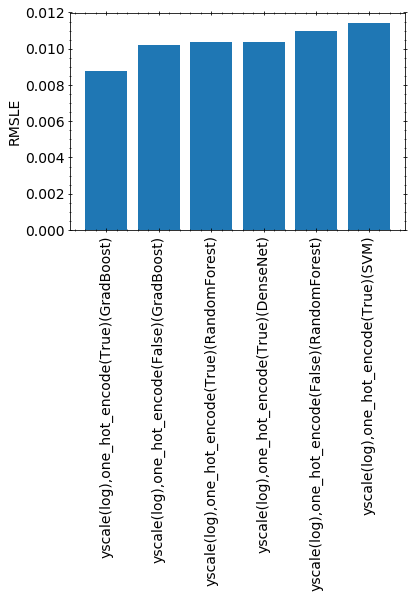

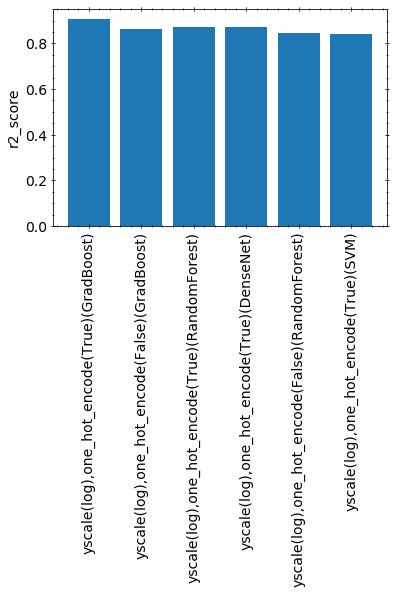

In [473]:
df_metrics['case_id(model)'] = df_metrics['case_id']+'('+df_metrics['model']+')'

df_metrics_top5 = df_metrics.loc[:5,:]

for metric in metrics.keys():
    fig, ax = plt.subplots(1,1)
    ax.bar(df_metrics_top5['case_id(model)'], df_metrics_top5[metric])
    ax.set_xticklabels(df_metrics['case_id(model)'], rotation='vertical')
    ax.grid(which='both',visible=False)
    ax.set_ylabel(metric)

In [474]:
print('\t\t----BoB case_id(model)----')
display(df_metrics.iloc[0,:])

		----BoB case_id(model)----


model                                               GradBoost
RMSLE                                              0.00875312
r2_score                                             0.907958
case_id                      yscale(log),one_hot_encode(True)
case_id(model)    yscale(log),one_hot_encode(True)(GradBoost)
Name: 0, dtype: object

We can see the log scaling with one hot encoding did the best. Let's fetch this model and inspect it further

### Fetch BoB Model

In [487]:
def fetch_feature_eng_case(path_cases_dict, case_id, model):
    data_dict = load_dict(path_cases_dict, case_id, 'data_dict.pickle')
    
    path_file = os.path.join(path_cases_dict[case_id], model, 'model_dict.dill')
    f = open(path_file, 'rb') 
    model_dict = dill.load(f)
    f.close()
    
    return data_dict, model_dict

In [489]:
case_id_BoB = df_metrics.iloc[0,:]['case_id']
model_BoB = df_metrics.iloc[0,:]['model']

data_dict, model_dict = fetch_feature_eng_case(path_cases_dict, case_id_BoB, model_BoB)

print('models_dict_BoB keys:')
for key in model_dict.keys():
    print('\t',key)

models_dict_BoB keys:
	 model
	 param_grid
	 GridSearchCV
	 best_model
	 best_params
	 best_cv_score
	 y_test
	 y_pred
	 best_pred_score
	 RMSLE
	 r2_score


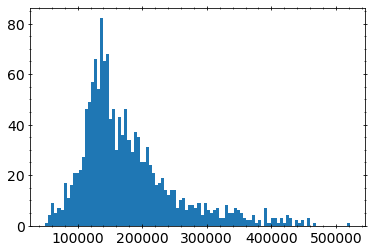

In [492]:
y_test_log10 = model_dict['best_model'].predict(data_dict['X_test'])
y_test = 10**y_test_log10

plt.hist(y_test,bins=100)
plt.grid(which='both')

In [493]:
df_submission = pd.DataFrame()
df_submission['Id'] = data_dict['X_test'].index.values
df_submission['SalePrice'] = y_test
df_submission.head()

,Id,SalePrice
0,1461,126996.399739
1,1462,158851.357172
2,1463,186553.924043
3,1464,190403.016549
4,1465,189272.931647


In [494]:
df_submission.to_csv('df_submission.csv',index=False)